## Neural Networks
### In-class practise: Solve MNIST classification with basic sklearn functions

by Stefan Heinrich

In [2]:
from IPython.display import display
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import neural_network
import sklearn.preprocessing
import seaborn as sns

#### Loading Iris dataset with seaborn


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


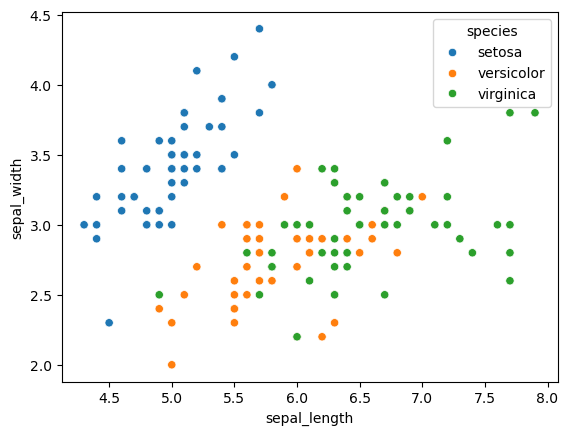

In [3]:
iris_df = sns.load_dataset("iris")

display(iris_df.head(n=3))

plot_raw = sns.scatterplot(x=iris_df['sepal_length'], y=iris_df['sepal_width'],
                           hue=iris_df['species'])

#### Run logistic regression via sklearn

This is for comparison with what you learned last week.
- Try to get an understanding about the complexity of the data.
- Use regression on different parts of the data (so different column, other than the sepal_length and sepal_width combination)


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


[[3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 ...
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]]
[[1.5  1.5  1.5  ... 1.5  1.5  1.5 ]
 [1.52 1.52 1.52 ... 1.52 1.52 1.52]
 [1.54 1.54 1.54 ... 1.54 1.54 1.54]
 ...
 [4.86 4.86 4.86 ... 4.86 4.86 4.86]
 [4.88 4.88 4.88 ... 4.88 4.88 4.88]
 [4.9  4.9  4.9  ... 4.9  4.9  4.9 ]]


/var/folders/ff/m9yn9h517xx24b6m1snyknz00000gn/T/ipykernel_70308/892825752.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris_species_ids = iris_df['species'].replace(iris_classes_dict)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


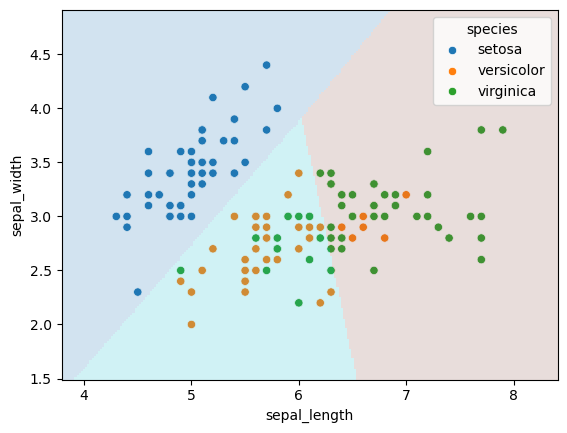

In [4]:
# Create an instance of Logistic Regression Classifier and fit the data.
r_strength = 100000  # Inverse of regularization strength in [1,Inf]
l_solver = 'newton-cg'  # Optimisation algorithm in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
m_class = 'multinomial'  # see documentation

logreg = LogisticRegression(C=r_strength, solver=l_solver,
                            multi_class=m_class)

# directly access iris_df['sepal_length'] and iris_df['sepal_width']
iris_df_inputs = iris_df[['sepal_length', 'sepal_width']]
display(iris_df.head(n=3))
# other options:
#iris_inputs = iris_df.values[:,:2]
#iris_inputs = iris_df.iloc[:,:2]

#convert 'species' from labels to ids
iris_classes = list(set(iris_df['species']))
iris_classes_dict = {iris_classes[k]: k for k in range(len(iris_classes))}
iris_species_ids = iris_df['species'].replace(iris_classes_dict)

# we only take the first two features
#logreg.fit(iris_data_inputs[:, :2], iris_data_targets_ids)
logreg.fit(iris_df_inputs, iris_species_ids)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = iris_df['sepal_length'].min() - .5, iris_df['sepal_length'].max() + .5
y_min, y_max = iris_df['sepal_width'].min() - .5, iris_df['sepal_width'].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx)
print(yy)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])  # this is not a clean way to do and will raise a warning (we only process values here, but trained with dataframes that had names), but for our purpose that's fine
Z = Z.reshape(xx.shape)

plot_rsk = sns.scatterplot(x=iris_df['sepal_length'], y=iris_df['sepal_width'],
                           hue=iris_df['species'])
plot_rsk.pcolormesh(xx, yy, Z, alpha=0.2, cmap=plt.cm.tab10)


#### Perform supervised training of an MLP via sklearn
The steps are the usual: preprocessing, model building, model training

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [5]:
# extract features and labels (here named `inp` and `out`)

n_datapoints = len(iris_df)
# here we define, which variables we want to use as input for learning
iris_df_inp = iris_df[
    ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_df_out = iris_df['species']

p_random_seed = 13
p_datasplit = 0.2  # how much percent of the data is used for testing
random.seed(p_random_seed)  # init the random generator with a seed

In [6]:
# normalization
norm_data = sklearn.preprocessing.normalize(iris_df_inp)

for i, col in enumerate(iris_df_inp.columns):
    iris_df_inp.iloc[:, i] = norm_data[:, i].copy()
iris_df_inp

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


In [7]:
# for the split we use the sklearn model_selection module
iris_df_inp_train, iris_df_inp_test, iris_df_out_train, iris_df_out_test = model_selection.train_test_split(
    iris_df_inp, iris_df_out, test_size=p_datasplit,
    random_state=p_random_seed)
#display(iris_df_inp_train.head(n=3), iris_df_out_train.head(n=3))
#display(iris_df_inp_test.head(n=3), iris_df_out_test.head(n=3))

In [8]:
# parameters for the MLP shape
hidden_layer_sizes = (8, 4)  # tuple of sizes of hidden layers
activation ='relu'  # activation_fkt, {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

#parameters for the learning
optimiser = 'sgd'  # {‘lbfgs’, ‘sgd’, ‘adam’}
learning_rate_init = 0.01  # learning_rate, try something smaller first!
learning_rate = 'constant'  # learning_rate_type, {‘constant’, ‘invscaling’, ‘adaptive’}
max_iter = 200  # epoches, number of training interations
batch_size = 1  # number of training examples per epoch
momentum = 0.95  # [0,1]

clf_mlp = neural_network.MLPClassifier(
    random_state=p_random_seed, solver=optimiser, activation=activation,
    hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init,
    max_iter=max_iter, learning_rate=learning_rate, momentum=momentum,
    batch_size=batch_size, nesterovs_momentum=True, alpha=1e-05,
    beta_1=0.9, beta_2=0.999, epsilon=1e-08, early_stopping=False,
    n_iter_no_change=10, power_t=0.5, tol=0.0001, validation_fraction=0.1,
    shuffle=False, verbose=True, warm_start=False)

In [13]:
iris_df_inp_train.join(iris_df_out_train)

print(iris_df_inp_train)

     sepal_length  sepal_width  petal_length  petal_width
137      0.698048     0.338117      0.599885     0.196326
32       0.765783     0.603791      0.220899     0.014727
31       0.822250     0.517713      0.228403     0.060907
141      0.733379     0.329489      0.542063     0.244460
146      0.729654     0.289545      0.579090     0.220054
..            ...          ...           ...          ...
126      0.727852     0.328707      0.563498     0.211312
98       0.782581     0.383618      0.460341     0.168792
16       0.794289     0.573653      0.191218     0.058836
74       0.767417     0.347736      0.515608     0.155882
82       0.764350     0.355818      0.513959     0.158141

[120 rows x 4 columns]


In [10]:
clf_mlp.fit(iris_df_inp_train, iris_df_out_train)

test_accuracy = clf_mlp.score(iris_df_inp_test, iris_df_out_test)
print("Prediction accuracy:", test_accuracy)

# # **uncomment this for iterative fitting (to see every epoch)
# for k in range(max_iter):
#     clf_mlp.partial_fit(
#         iris_df_inp_train,
#         iris_df_out_train,
#         classes=list(set(iris_df['species']))
#     )
#     test_accuracy = clf_mlp.score(iris_df_inp_test, iris_df_out_test)
#     print("Prediction epoch: ",k," accuracy:", test_accuracy)

Iteration 1, loss = 1.04889657
Iteration 2, loss = 0.58155511
Iteration 3, loss = 0.49309806
Iteration 4, loss = 0.46355500
Iteration 5, loss = 0.51315695
Iteration 6, loss = 0.52022941
Iteration 7, loss = 0.42576841
Iteration 8, loss = 0.41449659
Iteration 9, loss = 0.39660939
Iteration 10, loss = 0.38785282
Iteration 11, loss = 0.35616862
Iteration 12, loss = 0.33975358
Iteration 13, loss = 0.30018274
Iteration 14, loss = 0.29026071
Iteration 15, loss = 0.27677703
Iteration 16, loss = 0.26440900
Iteration 17, loss = 0.25824321
Iteration 18, loss = 0.25339822
Iteration 19, loss = 0.24770178
Iteration 20, loss = 0.25240279
Iteration 21, loss = 0.25433539
Iteration 22, loss = 0.25410846
Iteration 23, loss = 0.24900949
Iteration 24, loss = 0.24405250
Iteration 25, loss = 0.23808219
Iteration 26, loss = 0.20895468
Iteration 27, loss = 0.22985344
Iteration 28, loss = 0.21059757
Iteration 29, loss = 0.21622021
Iteration 30, loss = 0.20615472
Iteration 31, loss = 0.20139229
Iteration 32, los

#### Analyse the mlp training results

The following plots are examples for getting *some* understanding of the model performance.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.88      0.93         8
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(50.722222222222214, 0.5, 'true label')

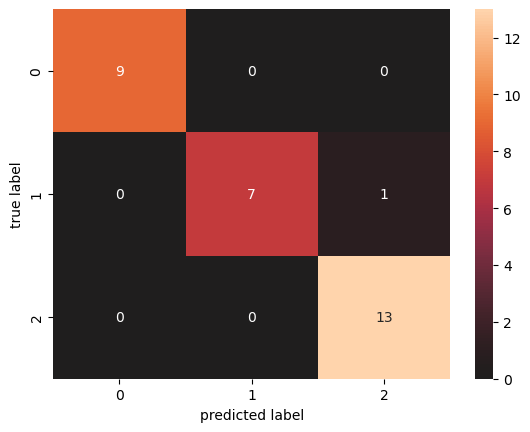

In [11]:
test_pred = clf_mlp.predict(iris_df_inp_test)
print(metrics.classification_report(iris_df_out_test, test_pred))

confusion_matrix = metrics.confusion_matrix(iris_df_out_test, test_pred)
plot_tree_cm = sns.heatmap(confusion_matrix, annot=True, center=0)
plot_tree_cm.set_xlabel('predicted label')
plot_tree_cm.set_ylabel('true label')

In [12]:
#plot the exact predictions
pred = clf_mlp.predict(iris_df_inp_test)
print("Prediction:", list(zip(*[pred, iris_df_out_test])))

proba = clf_mlp.predict_proba(iris_df_inp_test)
print("Prediction probabilities:", proba)

#plot the resulting weight matrix
display(
    "Weights: " + str([coef.shape for coef in clf_mlp.coefs_]), 
    clf_mlp.coefs_
)

Prediction: [(np.str_('versicolor'), 'versicolor'), (np.str_('versicolor'), 'versicolor'), (np.str_('setosa'), 'setosa'), (np.str_('virginica'), 'virginica'), (np.str_('virginica'), 'virginica'), (np.str_('setosa'), 'setosa'), (np.str_('virginica'), 'virginica'), (np.str_('virginica'), 'virginica'), (np.str_('setosa'), 'setosa'), (np.str_('versicolor'), 'versicolor'), (np.str_('virginica'), 'virginica'), (np.str_('virginica'), 'virginica'), (np.str_('versicolor'), 'versicolor'), (np.str_('setosa'), 'setosa'), (np.str_('virginica'), 'virginica'), (np.str_('setosa'), 'setosa'), (np.str_('virginica'), 'virginica'), (np.str_('virginica'), 'virginica'), (np.str_('versicolor'), 'versicolor'), (np.str_('setosa'), 'setosa'), (np.str_('versicolor'), 'versicolor'), (np.str_('setosa'), 'setosa'), (np.str_('setosa'), 'setosa'), (np.str_('virginica'), 'virginica'), (np.str_('virginica'), 'versicolor'), (np.str_('virginica'), 'virginica'), (np.str_('setosa'), 'setosa'), (np.str_('virginica'), 'virgi

'Weights: [(4, 8), (8, 4), (4, 3)]'

[array([[ 1.42470717, -0.36403973,  0.44978594,  0.92541137,  0.65551468,
         -0.06456756,  3.24301551, -8.21784033],
        [ 1.72318177,  0.30794724, -0.644921  ,  0.47733163, -0.61235899,
          0.49525632,  1.7079938 , -4.94939342],
        [-3.17180685, -0.21141032, -0.68046206, -2.04358075,  0.62290972,
         -0.39128418, -4.33423431, 12.21827528],
        [-2.31941901, -0.60324333,  0.18007747, -0.51445495, -0.68142888,
          0.34201146, -3.24878138,  9.94795556]]),
 array([[-1.49642719,  0.27108985,  0.37875014, -2.61931385],
        [-0.05813647, -0.342608  , -0.16736905,  0.1449991 ],
        [ 0.3777991 , -0.59931391,  0.25810667,  0.06693848],
        [-0.67147322, -0.65182197, -0.45373821, -1.49604997],
        [ 0.59086961,  0.24981211, -0.36387647,  0.09554631],
        [ 0.07855068, -0.5926288 ,  0.47118788, -0.13132526],
        [-0.63935191, -0.42870495, -0.07505856,  0.71733738],
        [ 1.90221371,  0.19082082, -0.03803937, -2.55479849]]),
 array([